<a href="https://colab.research.google.com/github/aish0606/DeepLearning/blob/main/Applications/NN_using_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [27]:
x, y = sklearn.datasets.make_moons(n_samples=200, noise=0.15)

In [28]:
print(x[:3])
print(y[:3])
x.shape

[[ 0.1569444   0.02905619]
 [ 1.82315415 -0.05319725]
 [ 0.94361424 -0.2337272 ]]
[1 1 1]


(200, 2)

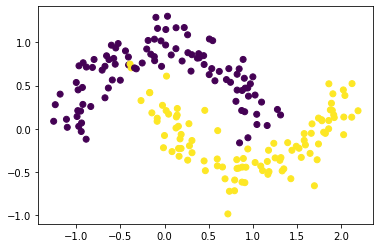

In [29]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [50]:
input_neuron = 2
output_neuron = 2
sample = x.shape[0]
learning_rate = 0.001
# Here we are using Regularization technique, so adding lambda=
lambda_reg = 0.01

In [60]:
def retrive(model_dict):
  w1 = model_dict['w1']
  b1 = model_dict['b1']
  w2 = model_dict['w2']
  b2 = model_dict['b2']  
  return w1, b1, w2, b2

In [61]:
def forward(x, model_dict):
  w1, b1, w2, b2 = retrive(model_dict)
  z1 = x.dot(w1) + b1
  a1 = np.tanh(z1)
  z2 = a1.dot(w2) + b2
  # a2 = np.tanh(z2)
  exp_score = np.exp(z2)
  softmax = exp_score / np.sum(exp_score, axis=1, keepdims=True)
  return z1, a1, softmax

In [62]:
def loss(softmax, y, model_dict):
  w1, b1, w2, b2 = retrive(model_dict)
  m = np.zeros(200)
  for i, correct_pred in enumerate(y):
    predicted = softmax[i][correct_pred]
    m[i] = predicted
  
  log_prob = -np.log(predicted)
  loss = np.sum(log_prob)
  reg_loss = (lambda_reg / 2) * (np.sum(np.square(w1)) + np.sum(np.square(w2)))
  loss += reg_loss
  return float(loss / y.shape[0])

In [63]:
def predict(x, model_dict):
  w1, b1, w2, b2 = retrive(model_dict)
  z1 = x.dot(w1) + b1
  a1 = np.tanh(z1)
  z2 = a1.dot(w2) + b2
  a2 = np.tanh(z2)
  exp_score = np.exp(a2)
  softmax = exp_score / np.sum(exp_score, dim=1, keepdims=True)
  # this below line will return the index of max value feature (0 or 1)
  return np.argmax(softmax, axis=1)

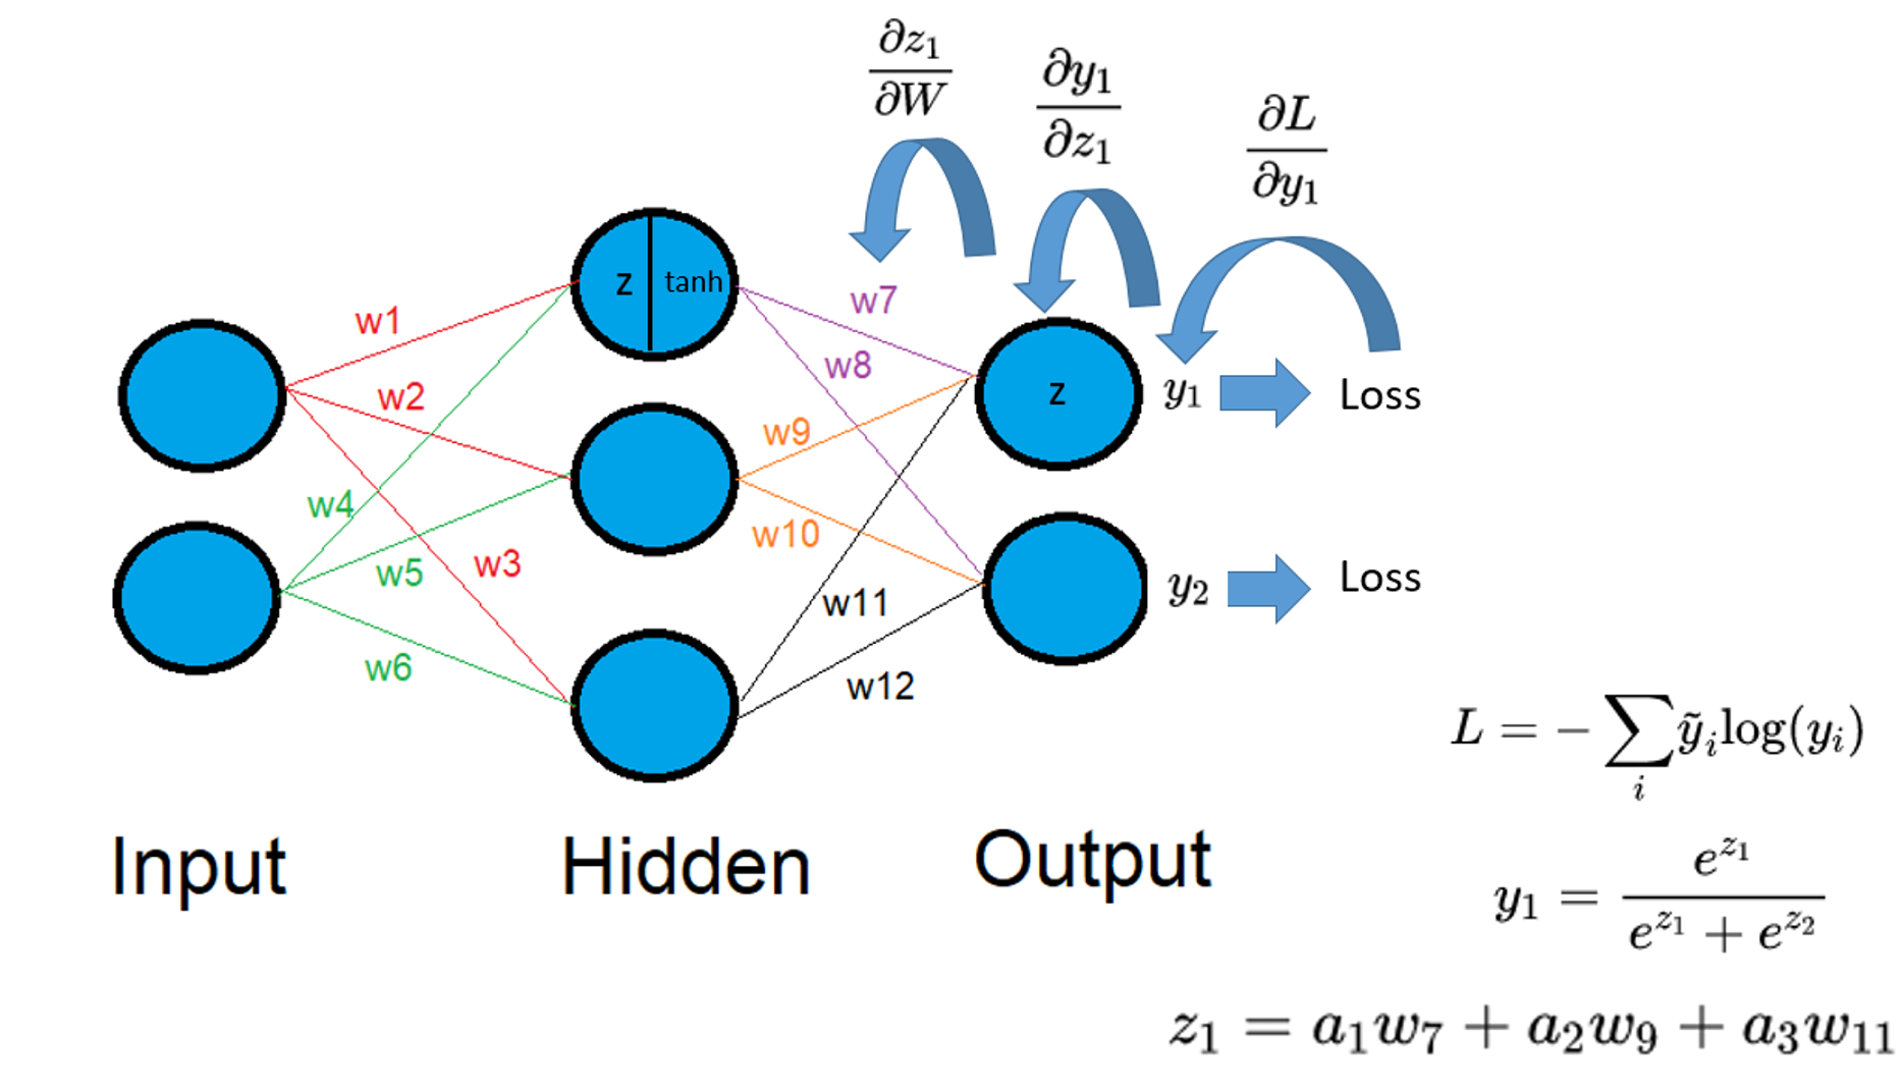

In [72]:
def backpropagation(x, y, model_dict, epochs):
    for i in range(epochs):
        w1, b1, w2, b2 = retrive(model_dict)
        z1, a1, probs = forward(x, model_dict)    # a1: (200,3), probs: (200,2)
        delta3 = np.copy(probs)
        delta3[range(x.shape[0]), y] -= 1      # (200,2)
        dW2 = (a1.T).dot(delta3)               # (3,2)
        db2 = np.sum(delta3, axis=0, keepdims=True)        # (1,2)
        delta2 = delta3.dot(w2.T) * (1 - np.power(np.tanh(z1), 2))
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # Add regularization terms
        dW2 += lambda_reg * np.sum(w2)  
        dW1 += lambda_reg * np.sum(w1)  
        # Update Weights: W = W + (-lr*gradient) = W - lr*gradient
        w1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        w2 += -learning_rate * dW2
        b2 += -learning_rate * db2
        # Update the model dictionary
        model_dict = {'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2}
        # Print the loss every 50 epochs
        if i%50 == 0:
            print("Loss at epoch {} is: {:.3f}".format(i,loss(probs,y, model_dict)))
            
    return model_dict

In [73]:
# Define Initial Weights
def init_network(input_dim, hidden_dim, output_dim):
    model = {}
    # Xavier Initialization 
    w1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
    b1 = np.zeros((1, hidden_dim))
    w2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
    b2 = np.zeros((1, output_dim))
    model['w1'] = w1
    model['b1'] = b1
    model['w2'] = w2
    model['b2'] = b2
    return model

In [77]:
def plot_decision_boundary(pred_func): 
    """
    Code adopted from: https://github.com/dennybritz/nn-from-scratch
    """
    # Set min and max values and give it some padding 
    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5 
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5 
    h = 0.01 
    # Generate a grid of points with distance h between them 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
    # Predict the function value for the whole gid 
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) 
    # Plot the contour and training examples 
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral) 
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Spectral) 
    plt.title("Decision Boundary for hidden layer size 3")

In [79]:
# Now Let's start the action
model_dict = init_network(input_dim = input_neuron , hidden_dim = 3, output_dim = output_neuron)
model = backpropagation(x, y, model_dict, epochs=1500)
# plot_decision_boundary(lambda x: predict(model, x))

Loss at epoch 0 is: 0.003
Loss at epoch 50 is: 0.005
Loss at epoch 100 is: 0.005
Loss at epoch 150 is: 0.005
Loss at epoch 200 is: 0.005
Loss at epoch 250 is: 0.004
Loss at epoch 300 is: 0.004
Loss at epoch 350 is: 0.003
Loss at epoch 400 is: 0.003
Loss at epoch 450 is: 0.003
Loss at epoch 500 is: 0.002
Loss at epoch 550 is: 0.002
Loss at epoch 600 is: 0.002
Loss at epoch 650 is: 0.002
Loss at epoch 700 is: 0.002
Loss at epoch 750 is: 0.002
Loss at epoch 800 is: 0.002
Loss at epoch 850 is: 0.002
Loss at epoch 900 is: 0.002
Loss at epoch 950 is: 0.002
Loss at epoch 1000 is: 0.002
Loss at epoch 1050 is: 0.002
Loss at epoch 1100 is: 0.002
Loss at epoch 1150 is: 0.002
Loss at epoch 1200 is: 0.002
Loss at epoch 1250 is: 0.002
Loss at epoch 1300 is: 0.002
Loss at epoch 1350 is: 0.002
Loss at epoch 1400 is: 0.002
Loss at epoch 1450 is: 0.002
